In [1]:
import spot, buddy
import WBA_utils
from IPython.display import display

In [2]:
# Test automata

all_WBA = ["""HOA: v1
States: 6
Start: 0
AP: 2 "a" "b"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
name: "rabbit"
--BODY--
State: 0
[t] 1
State: 1
[t] 2
[t] 0 <-75> {0}
[t] 4 <-25>
State: 2
[t] 1
[t] 3
[t] 5 <-50>
State: 3
[t] 3 <1>
[t] 2 <-50>
State: 4
[t] 4 <1>
[t] 1 <-25>
State: 5
[t] 5 <1>
[t] 2
--END--
"""
]

---------------
  Test case 0
---------------


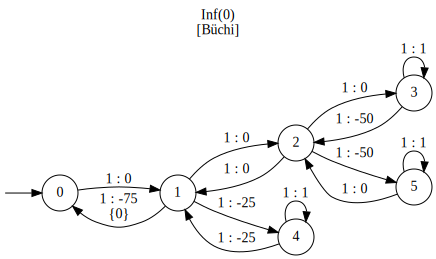

Original automaton


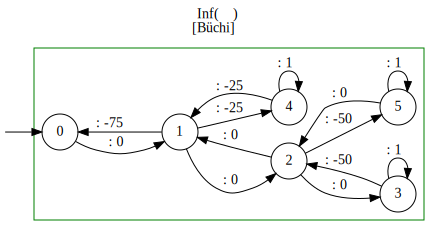

Prefix energy per state
array('q', [0, 75, 75, 75, 75, 75])
Current optimal predescessor
[array('Q'), array('Q', [1, 5, 11, 5]), array('Q', [2, 9, 2, 13]), array('Q', [6, 8, 8]), array('Q', [4, 10, 10]), array('Q', [7, 12, 12])]
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


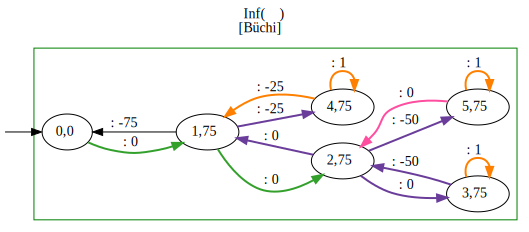

Checking SCC 0
Degeneralized SCC has: 6 states, 13 edges and 1 back-edges.
Current SCC with: 6 states and 1 back-edges
{0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 4: 5}


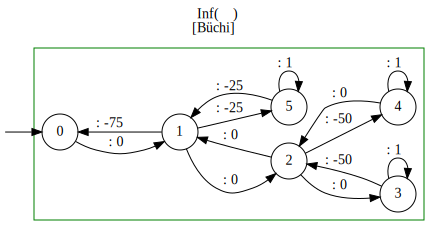

Analysing backedge 1:0 -> 0:0.
We start with 0 energy in state 0:0.
1->5
array('q', [0, 75, 75, 75, 75, 75]) [array('Q'), array('Q', [1, 5, 13, 5]), array('Q', [2, 9, 2, 11]), array('Q', [6, 8, 8]), array('Q', [7, 10, 10]), array('Q', [4, 12, 12])]
We found a non-negative loop using edge 1:0 -> 0:0 directly.


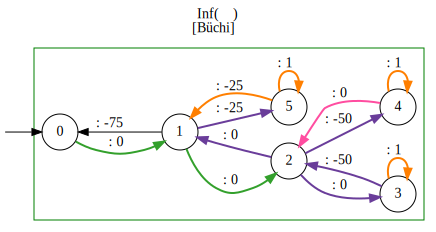

BuechiResult(g=<spot.twa_graph; proxy of <Swig Object of type 'std::shared_ptr< spot::twa_graph > *' at 0x7fcfc0070bd0> >, gScc=<spot.twa_graph; proxy of <Swig Object of type 'std::shared_ptr< spot::twa_graph > *' at 0x7fcfc0073210> >, renameDict={0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 4: 5}, opts={'wup': 75, 'ic': 0, 's0': 0}, prefixEn=array('q', [0, 75, 75, 75, 75, 75]), prefixPred=[array('Q'), array('Q', [1, 5, 11, 5]), array('Q', [2, 9, 2, 13]), array('Q', [6, 8, 8]), array('Q', [4, 10, 10]), array('Q', [7, 12, 12])], be=3, sccEn1=array('q', [0, 75, 75, 75, 75, 75]), sccPred1=[array('Q'), array('Q', [1, 5, 13, 5]), array('Q', [2, 9, 2, 11]), array('Q', [6, 8, 8]), array('Q', [7, 10, 10]), array('Q', [4, 12, 12])], sWup=-1, sccEn2=None, sccPred2=None)
pred pref
0 []
1 [0, 2, 4, 2]
2 [1, 3, 1, 5]
3 [2, 3, 3]
4 [1, 4, 4]
5 [2, 5, 5]
pred scc


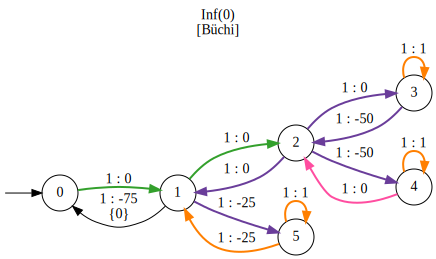

0 []
1 [0, 2, 5, 2]
2 [1, 3, 1, 4]
3 [2, 3, 3]
4 [2, 4, 4]
5 [1, 5, 5]


AssertionError: This is not supposed to happen, there should be a viable trace

In [3]:
# Solve the test cases
for i, wba in enumerate(all_WBA):
    # input: automaton, start state, WUP, start credit, display?
    print(f"---------------\n  Test case {i}\n---------------")
    aut_wba = spot.automaton(wba)
    display(aut_wba)
    br = WBA_utils.BuechiEnergy(aut_wba, 0, 75, 0, 2)
    print(br)
    print("pred pref")
    for i, pred in enumerate(br.prefixPred):
        print(i, [br.g.edge_storage(e).src for e in pred])
    print("pred scc")
    display(br.gScc)
    for i, pred in enumerate(br.sccPred1):
        print(i, [br.gScc.edge_storage(e).src for e in pred])
    t = WBA_utils.traceExctraction(br, True)
    print(t)